In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
len(x_train)  

60000

In [4]:
len(x_test) 

10000

In [5]:
len(y_test) 

10000

In [6]:
len(y_train)

60000

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_train[0]
#- **Image Shape**: Each image is 28x28 pixels, totaling 784 pixels per image.
#- **First Image Data**: Shows raw pixel values (0 to 255) representing grayscale intensity.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

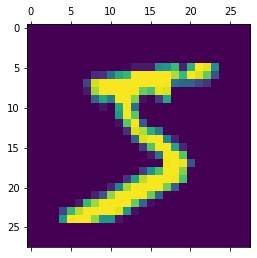

In [9]:
plt.matshow(x_train[0])

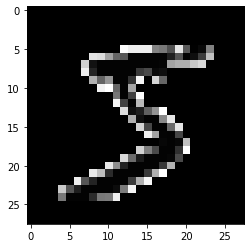

In [10]:
plt.imshow(-x_train[0], cmap="gray")
#- **Visualization**: Displays the first image, showing how it would look in grayscale.

In [11]:
x_train = x_train / 255
x_test = x_test / 255
#- **Normalization**: Scales pixel values to a range between 0 and 1, helping the neural network process data efficiently.

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),    #Input layer
keras.layers.Dense(128, activation="relu"),    #hidden layer abs
keras.layers.Dense(10, activation="softmax")   #output layer
])
model.summary()

#- **Sequential Model**: Defines a linear stack of layers.
#- **Flatten Layer**: Reshapes each 28x28 image into a 1D array of 784 values.
#- **Dense Layer (128 units, ReLU)**: First hidden layer with 128 neurons using ReLU activation.
#- **Output Layer (10 units, Softmax)**: Final layer with 10 neurons (one per
#class), using Softmax to produce probabilities for each digit.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="sgd",   # Stochastic Gradient Descent
loss="sparse_categorical_crossentropy",    # crossentropy reduces the loss
metrics=['accuracy'])

#- **Optimizer**: Stochastic Gradient Descent (SGD) for weight updates.
#- **Loss**: `sparse_categorical_crossentropy` for multi-class classification.
#- **Metrics**: Tracks accuracy during training.

In [15]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)   

#- **Training**: Runs for 10 epochs, with both training and validation data (test
#data) evaluated at each epoch.
#- **History Object**: Stores accuracy and loss metrics for each epoch.

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6701 - accuracy: 0.8320 - val_loss: 0.3594 - val_accuracy: 0.9018
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3386 - accuracy: 0.9054 - val_loss: 0.2945 - val_accuracy: 0.9165
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2889 - accuracy: 0.9189 - val_loss: 0.2631 - val_accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9272 - val_loss: 0.2361 - val_accuracy: 0.9336
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2346 - accuracy: 0.9339 - val_loss: 0.2180 - val_accuracy: 0.9380
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2159 - accuracy: 0.9393 - val_loss: 0.2003 - val_accuracy: 0.9434
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1999 - accuracy: 0.9441 - val_loss: 0.1900 - val_accuracy

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

#- **Evaluation**: Calculates final loss and accuracy on test data to see how well
#the model performs on unseen data.

313/313 [==============================] - 1s 3ms/step - loss: 0.1594 - accuracy: 0.9524
Loss=0.159
Accuracy=0.952


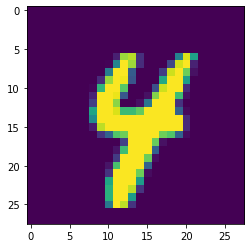

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

#- **Random Test Image**: Selects a random test image and displays it for visualization.

In [18]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

#- **Prediction**: Uses the model to predict the digit in the randomly selected test image.
#- **Argmax**: Finds the digit with the highest predicted probability.

Handwritten number in the image is= 4


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

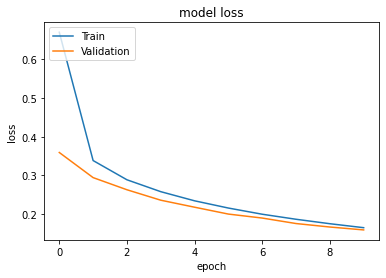

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#- **Accuracy Plot**: Shows training and validation accuracy over epochs to visualize model performance.

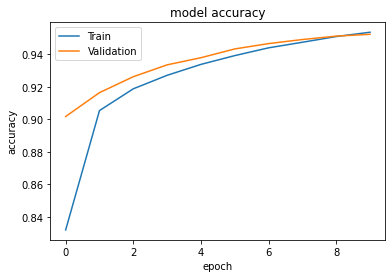

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#- **Loss Plot**: Plots training and validation loss over epochs, useful for analyzing model learning and overfitting.

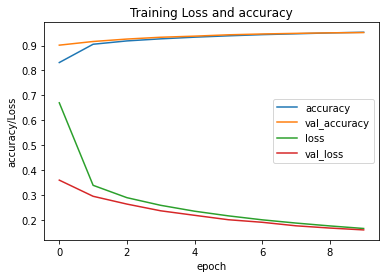

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

#- **Combined Plot**: Displays accuracy and loss trends for both training and
#validation data in a single plot, providing an overview of model learning.